# Running the Tweeted Configurations

This notebook runs the latest tweeted battery model configuration, and can also be modified and played with. The notebook requires no user input (unless you want to modify some stuff).

Access this on Google Colab [here](https://colab.research.google.com/github/pybamm-team/BattBot/blob/main/bot/run-simulation.ipynb).

In [1]:
%pip install git+https://github.com/pybamm-team/PyBaMM@develop -q  # install the develop branch of PyBaMM
import os
import pybamm
import logging
import requests
import numpy as np
import matplotlib.pyplot as plt


# logging configs
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.INFO)


We start by opening config.txt, where the most recent tweeted configuration is stored. Next we read that data and convert it into a python dictionary.

In [2]:
# open the file and read the python dictionary for configurations
url = "https://raw.githubusercontent.com/pybamm-team/BattBot/main/bot/config.txt"
r = requests.get(url, allow_redirects=True)
open('config.txt', 'wb').write(r.content)
f = open('config.txt', 'r')
config = eval(f.read())

# varied parameter values, you can play with them too
param_values = config["varied_values"]

# extracting the models from "config" dictionary
models = []
if "DFN" in config["model"]:
    models.append(pybamm.lithium_ion.DFN(
        options=config["model options"]
    ))
if "spm.SPM" in config["model"]:
    models.append(pybamm.lithium_ion.SPM(
        options=config["model options"]
    ))
if "spme.SPMe" in config["model"]:
    models.append(pybamm.lithium_ion.SPMe(
        options=config["model options"]
    ))

# closing the file
f.close()
config
# here you can update the config dictionary by doing something like this -
# config.update({
#   "key": value 
# })
# the default dictionary which changes everytime a plot is tweeted is printed below

{'model': '<pybamm.models.full_battery_models.lithium_ion.spm.SPM object at 0x7fd7641f33a0>',
 'model options': {'cell geometry': 'arbitrary',
  'convection': 'none',
  'current collector': 'uniform',
  'dimensionality': 0,
  'electrolyte conductivity': 'default',
  'external submodels': [],
  'hydrolysis': 'false',
  'lithium plating': 'none',
  'lithium plating porosity change': 'false',
  'loss of active material': 'stress-driven',
  'operating mode': 'current',
  'particle': 'Fickian diffusion',
  'particle mechanics': 'swelling only',
  'particle shape': 'spherical',
  'particle size': 'single',
  'SEI': 'none',
  'SEI porosity change': 'false',
  'surface form': 'false',
  'thermal': 'isothermal',
  'total interfacial current density as a state': 'false',
  'working electrode': 'both',
  'SEI film resistance': 'none'},
 'chemistry': {'chemistry': 'lithium_ion',
  'cell': 'UMBL_Mohtat2020',
  'negative electrode': 'graphite_UMBL_Mohtat2020',
  'separator': 'separator_Mohtat2020',


In [3]:
# a class that scales functional parameters
class FunctionLike:
    "Behaves like a function but saves fun and parameter"

    def __init__(self, fun, parameter):
        self.fun = fun
        self.parameter = parameter

    def __call__(self, *args):
        return self.parameter * self.fun(*args)

    def __str__(self):
        return str(self.parameter)

The following cell is meant to plot summary variables, if they weren't tweeted in the latest tweet then you can skip this. (Note: running the cell won't make a difference if the last tweet was not about summary variables)

2021-09-19 19:59:08,097 - [INFO] <ipython-input-4-d24e921a4013>.<module>(94): Positive electrode Young's modulus [Pa]: 574603045303.4761
2021-09-19 19:59:11,203 - [NOTICE] simulation.solve(809): Cycle 1/59 (40.237 ms elapsed) --------------------
2021-09-19 19:59:11,205 - [NOTICE] simulation.solve(843): Cycle 1/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:11,275 - [NOTICE] simulation.solve(843): Cycle 1/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:11,317 - [NOTICE] simulation.solve(843): Cycle 1/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:11,370 - [NOTICE] simulation.solve(843): Cycle 1/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:11,819 - [NOTICE] simulation.solve(921): Capacity is now 4.969 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:11,821 - [NOTICE] simulation.solve(809): Cycle 2/59 (658.276 ms elapsed) --------------------
2021-09-19 19:59:11,823 - [NOTICE] simulation.solve(843): Cycle 2/59, step 1/4: Discharge at 2

2021-09-19 19:59:13,046 - [NOTICE] simulation.solve(843): Cycle 13/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:13,059 - [NOTICE] simulation.solve(843): Cycle 13/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:13,076 - [NOTICE] simulation.solve(843): Cycle 13/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:13,137 - [NOTICE] simulation.solve(921): Capacity is now 4.968 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:13,139 - [NOTICE] simulation.solve(809): Cycle 14/59 (1.976 s elapsed) --------------------
2021-09-19 19:59:13,139 - [NOTICE] simulation.solve(843): Cycle 14/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:13,156 - [NOTICE] simulation.solve(843): Cycle 14/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:13,169 - [NOTICE] simulation.solve(843): Cycle 14/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:13,186 - [NOTICE] simulation.solve(843): Cycle 14/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:13,243 -

2021-09-19 19:59:14,398 - [NOTICE] simulation.solve(921): Capacity is now 4.967 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:14,400 - [NOTICE] simulation.solve(809): Cycle 26/59 (3.238 s elapsed) --------------------
2021-09-19 19:59:14,401 - [NOTICE] simulation.solve(843): Cycle 26/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:14,422 - [NOTICE] simulation.solve(843): Cycle 26/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:14,435 - [NOTICE] simulation.solve(843): Cycle 26/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:14,452 - [NOTICE] simulation.solve(843): Cycle 26/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:14,517 - [NOTICE] simulation.solve(921): Capacity is now 4.967 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:14,518 - [NOTICE] simulation.solve(809): Cycle 27/59 (3.356 s elapsed) --------------------
2021-09-19 19:59:14,519 - [NOTICE] simulation.solve(843): Cycle 27/59, step 1/4: Discharge at 2 C unti

2021-09-19 19:59:15,797 - [NOTICE] simulation.solve(843): Cycle 38/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:15,809 - [NOTICE] simulation.solve(843): Cycle 38/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:15,826 - [NOTICE] simulation.solve(843): Cycle 38/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:15,885 - [NOTICE] simulation.solve(921): Capacity is now 4.966 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:15,886 - [NOTICE] simulation.solve(809): Cycle 39/59 (4.723 s elapsed) --------------------
2021-09-19 19:59:15,887 - [NOTICE] simulation.solve(843): Cycle 39/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:15,902 - [NOTICE] simulation.solve(843): Cycle 39/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:15,916 - [NOTICE] simulation.solve(843): Cycle 39/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:15,927 - [NOTICE] simulation.solve(843): Cycle 39/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:15,981 -

2021-09-19 19:59:17,121 - [NOTICE] simulation.solve(921): Capacity is now 4.965 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:17,122 - [NOTICE] simulation.solve(809): Cycle 51/59 (5.960 s elapsed) --------------------
2021-09-19 19:59:17,123 - [NOTICE] simulation.solve(843): Cycle 51/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:17,143 - [NOTICE] simulation.solve(843): Cycle 51/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:17,156 - [NOTICE] simulation.solve(843): Cycle 51/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:17,170 - [NOTICE] simulation.solve(843): Cycle 51/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:17,229 - [NOTICE] simulation.solve(921): Capacity is now 4.965 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:17,231 - [NOTICE] simulation.solve(809): Cycle 52/59 (6.068 s elapsed) --------------------
2021-09-19 19:59:17,231 - [NOTICE] simulation.solve(843): Cycle 52/59, step 1/4: Discharge at 2 C unti

2021-09-19 19:59:21,965 - [NOTICE] simulation.solve(809): Cycle 4/59 (981.779 ms elapsed) --------------------
2021-09-19 19:59:21,967 - [NOTICE] simulation.solve(843): Cycle 4/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:21,984 - [NOTICE] simulation.solve(843): Cycle 4/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:21,997 - [NOTICE] simulation.solve(843): Cycle 4/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:22,009 - [NOTICE] simulation.solve(843): Cycle 4/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:22,074 - [NOTICE] simulation.solve(921): Capacity is now 4.969 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:22,075 - [NOTICE] simulation.solve(809): Cycle 5/59 (1.092 s elapsed) --------------------
2021-09-19 19:59:22,076 - [NOTICE] simulation.solve(843): Cycle 5/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:22,091 - [NOTICE] simulation.solve(843): Cycle 5/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:22,104 -

2021-09-19 19:59:23,179 - [NOTICE] simulation.solve(843): Cycle 16/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:23,190 - [NOTICE] simulation.solve(843): Cycle 16/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:23,252 - [NOTICE] simulation.solve(921): Capacity is now 4.968 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:23,253 - [NOTICE] simulation.solve(809): Cycle 17/59 (2.270 s elapsed) --------------------
2021-09-19 19:59:23,254 - [NOTICE] simulation.solve(843): Cycle 17/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:23,270 - [NOTICE] simulation.solve(843): Cycle 17/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:23,283 - [NOTICE] simulation.solve(843): Cycle 17/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:23,296 - [NOTICE] simulation.solve(843): Cycle 17/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:23,353 - [NOTICE] simulation.solve(921): Capacity is now 4.968 Ah (originally 4.969 Ah, will stop at 3.975 A

2021-09-19 19:59:24,425 - [NOTICE] simulation.solve(809): Cycle 29/59 (3.441 s elapsed) --------------------
2021-09-19 19:59:24,426 - [NOTICE] simulation.solve(843): Cycle 29/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:24,439 - [NOTICE] simulation.solve(843): Cycle 29/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:24,451 - [NOTICE] simulation.solve(843): Cycle 29/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:24,464 - [NOTICE] simulation.solve(843): Cycle 29/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:24,520 - [NOTICE] simulation.solve(921): Capacity is now 4.967 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:24,521 - [NOTICE] simulation.solve(809): Cycle 30/59 (3.538 s elapsed) --------------------
2021-09-19 19:59:24,522 - [NOTICE] simulation.solve(843): Cycle 30/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:24,536 - [NOTICE] simulation.solve(843): Cycle 30/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:24,

2021-09-19 19:59:25,800 - [NOTICE] simulation.solve(843): Cycle 41/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:25,811 - [NOTICE] simulation.solve(843): Cycle 41/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:25,862 - [NOTICE] simulation.solve(921): Capacity is now 4.967 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:25,863 - [NOTICE] simulation.solve(809): Cycle 42/59 (4.880 s elapsed) --------------------
2021-09-19 19:59:25,864 - [NOTICE] simulation.solve(843): Cycle 42/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:25,877 - [NOTICE] simulation.solve(843): Cycle 42/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:25,888 - [NOTICE] simulation.solve(843): Cycle 42/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:25,898 - [NOTICE] simulation.solve(843): Cycle 42/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:25,946 - [NOTICE] simulation.solve(921): Capacity is now 4.966 Ah (originally 4.969 Ah, will stop at 3.975 A

2021-09-19 19:59:26,994 - [NOTICE] simulation.solve(809): Cycle 54/59 (6.010 s elapsed) --------------------
2021-09-19 19:59:26,995 - [NOTICE] simulation.solve(843): Cycle 54/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:27,009 - [NOTICE] simulation.solve(843): Cycle 54/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:27,020 - [NOTICE] simulation.solve(843): Cycle 54/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:27,031 - [NOTICE] simulation.solve(843): Cycle 54/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:27,091 - [NOTICE] simulation.solve(921): Capacity is now 4.966 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:27,091 - [NOTICE] simulation.solve(809): Cycle 55/59 (6.108 s elapsed) --------------------
2021-09-19 19:59:27,094 - [NOTICE] simulation.solve(843): Cycle 55/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:27,108 - [NOTICE] simulation.solve(843): Cycle 55/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:27,

2021-09-19 19:59:32,731 - [NOTICE] simulation.solve(843): Cycle 7/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:32,746 - [NOTICE] simulation.solve(843): Cycle 7/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:32,758 - [NOTICE] simulation.solve(843): Cycle 7/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:32,770 - [NOTICE] simulation.solve(843): Cycle 7/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:32,826 - [NOTICE] simulation.solve(921): Capacity is now 4.968 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:32,827 - [NOTICE] simulation.solve(809): Cycle 8/59 (1.156 s elapsed) --------------------
2021-09-19 19:59:32,828 - [NOTICE] simulation.solve(843): Cycle 8/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:32,843 - [NOTICE] simulation.solve(843): Cycle 8/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:32,856 - [NOTICE] simulation.solve(843): Cycle 8/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:32,868 - [NOT

2021-09-19 19:59:33,906 - [NOTICE] simulation.solve(843): Cycle 19/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:33,958 - [NOTICE] simulation.solve(921): Capacity is now 4.968 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:33,961 - [NOTICE] simulation.solve(809): Cycle 20/59 (2.291 s elapsed) --------------------
2021-09-19 19:59:33,962 - [NOTICE] simulation.solve(843): Cycle 20/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:33,977 - [NOTICE] simulation.solve(843): Cycle 20/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:33,988 - [NOTICE] simulation.solve(843): Cycle 20/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:34,000 - [NOTICE] simulation.solve(843): Cycle 20/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:34,055 - [NOTICE] simulation.solve(921): Capacity is now 4.968 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:34,056 - [NOTICE] simulation.solve(809): Cycle 21/59 (2.384 s elapsed) ----------------

2021-09-19 19:59:35,102 - [NOTICE] simulation.solve(843): Cycle 32/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:35,118 - [NOTICE] simulation.solve(843): Cycle 32/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:35,129 - [NOTICE] simulation.solve(843): Cycle 32/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:35,140 - [NOTICE] simulation.solve(843): Cycle 32/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:35,189 - [NOTICE] simulation.solve(921): Capacity is now 4.967 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:35,190 - [NOTICE] simulation.solve(809): Cycle 33/59 (3.519 s elapsed) --------------------
2021-09-19 19:59:35,190 - [NOTICE] simulation.solve(843): Cycle 33/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:35,204 - [NOTICE] simulation.solve(843): Cycle 33/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:35,214 - [NOTICE] simulation.solve(843): Cycle 33/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:35,22

2021-09-19 19:59:36,397 - [NOTICE] simulation.solve(843): Cycle 44/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:36,464 - [NOTICE] simulation.solve(921): Capacity is now 4.966 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:36,464 - [NOTICE] simulation.solve(809): Cycle 45/59 (4.794 s elapsed) --------------------
2021-09-19 19:59:36,465 - [NOTICE] simulation.solve(843): Cycle 45/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:36,480 - [NOTICE] simulation.solve(843): Cycle 45/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:36,492 - [NOTICE] simulation.solve(843): Cycle 45/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:36,502 - [NOTICE] simulation.solve(843): Cycle 45/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:36,553 - [NOTICE] simulation.solve(921): Capacity is now 4.966 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:36,554 - [NOTICE] simulation.solve(809): Cycle 46/59 (4.884 s elapsed) ----------------

2021-09-19 19:59:37,592 - [NOTICE] simulation.solve(843): Cycle 57/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:37,607 - [NOTICE] simulation.solve(843): Cycle 57/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:37,619 - [NOTICE] simulation.solve(843): Cycle 57/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:37,638 - [NOTICE] simulation.solve(843): Cycle 57/59, step 4/4: Hold at 3.8 V until 31 mA
2021-09-19 19:59:37,687 - [NOTICE] simulation.solve(921): Capacity is now 4.966 Ah (originally 4.969 Ah, will stop at 3.975 Ah)
2021-09-19 19:59:37,688 - [NOTICE] simulation.solve(809): Cycle 58/59 (6.017 s elapsed) --------------------
2021-09-19 19:59:37,689 - [NOTICE] simulation.solve(843): Cycle 58/59, step 1/4: Discharge at 2 C until 3.6 V
2021-09-19 19:59:37,704 - [NOTICE] simulation.solve(843): Cycle 58/59, step 2/4: Rest for 9 minutes
2021-09-19 19:59:37,715 - [NOTICE] simulation.solve(843): Cycle 58/59, step 3/4: Charge at 2 C until 3.8 V
2021-09-19 19:59:37,72

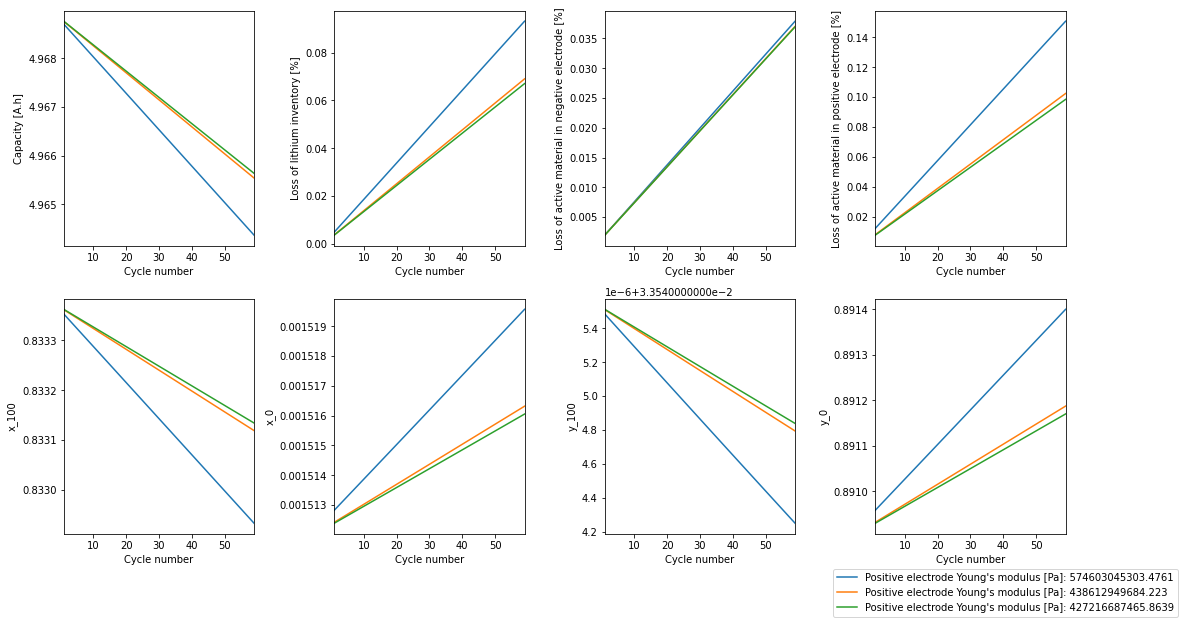

In [4]:
pybamm.set_logging_level("NOTICE")

# if summary variables were tweeted
if config["is_experiment"] and not config["is_comparison"]:

    # don't terminate early if Ai2020 parameter sets were used
    if config["chemistry"] == pybamm.parameter_sets.Ai2020:
        experiment = pybamm.Experiment(
            config["cycle"] * config["number"]
        )
    else:
        experiment = pybamm.Experiment(
            config["cycle"] * config["number"], termination="80% capacity"
        )

    parameter_values = pybamm.ParameterValues(chemistry=config["chemistry"])

    # update parameter sets for Mohtat2020 chemistry
    if config["chemistry"] == pybamm.parameter_sets.Mohtat2020:
        def lico2_volume_change_Ai2020(sto):
            omega = pybamm.Parameter("Positive electrode partial molar volume [m3.mol-1]")
            c_p_max = pybamm.Parameter("Maximum concentration in positive electrode [mol.m-3]")
            t_change = omega * c_p_max * sto
            return t_change


        def graphite_volume_change_Ai2020(sto):
            p1 = 145.907
            p2 = -681.229
            p3 = 1334.442
            p4 = -1415.710
            p5 = 873.906
            p6 = -312.528
            p7 = 60.641
            p8 = -5.706
            p9 = 0.386
            p10 = -4.966e-05
            t_change = (
                p1 * sto ** 9
                + p2 * sto ** 8
                + p3 * sto ** 7
                + p4 * sto ** 6
                + p5 * sto ** 5
                + p6 * sto ** 4
                + p7 * sto ** 3
                + p8 * sto ** 2
                + p9 * sto
                + p10
            )
            return t_change

        parameter_values.update(
            {
                # mechanical properties
                "Positive electrode Poisson's ratio": 0.3,
                "Positive electrode Young's modulus [Pa]": 375e9,
                "Positive electrode reference concentration for free of deformation [mol.m-3]": 0,  # noqa
                "Positive electrode partial molar volume [m3.mol-1]": -7.28e-7,
                "Positive electrode volume change": lico2_volume_change_Ai2020,
                "Negative electrode volume change": graphite_volume_change_Ai2020,
                # Loss of active materials (LAM) model
                "Positive electrode LAM constant exponential term": 2,
                "Positive electrode critical stress [Pa]": 375e6,
                # mechanical properties
                "Negative electrode Poisson's ratio": 0.3,
                "Negative electrode Young's modulus [Pa]": 15e9,
                "Negative electrode reference concentration for free of deformation [mol.m-3]": 0,  # noqa
                "Negative electrode partial molar volume [m3.mol-1]": 3.1e-6,
                # Loss of active materials (LAM) model
                "Negative electrode LAM constant exponential term": 2,
                "Negative electrode critical stress [Pa]": 60e6,
                # Other
                "Cell thermal expansion coefficient [m.K-1]": 1.48e-6,
                "SEI kinetic rate constant [m.s-1]": 1e-15,
                "Positive electrode LAM constant propotional term": 1e-3,
                "Negative electrode LAM constant propotional term": 1e-3,
                "EC diffusivity [m2.s-1]": 2e-18,
            },
            check_already_exists=False,
        )

    param_list = []
    labels = []
    solutions = []

    for i in range(0, len(config["varied_values"])):
        # copy the original values and append them in the list
        param_list.append(parameter_values.copy())

        # change a parameter value
        param_list[i][
            config["param_to_vary"]
        ] = config["varied_values"][i]

        logger.info(
            config["param_to_vary"] + ": " + str(param_values[i])
        )

        labels.append(config["param_to_vary"] + ": " + str(param_values[i]))

        sim = pybamm.Simulation(
            model=models[0],
            experiment=experiment,
            parameter_values=param_list[i],
        )

        if config["chemistry"] == pybamm.parameter_sets.Ai2020:
            sim.solve(calc_esoh=False)
        elif config["chemistry"] == pybamm.parameter_sets.Mohtat2020:
            sim.solve(initial_soc=1)
        else:
            sim.solve()
        solution = sim.solution
        solutions.append(solution)

    # defining the summary variables
    if config["chemistry"] == pybamm.parameter_sets.Ai2020:
        vars_to_plot = [
            "Measured capacity [A.h]",
            "Loss of lithium inventory [%]",
            "Loss of active material in negative electrode [%]",
            "Loss of active material in positive electrode [%]",
        ]
    else:
        vars_to_plot = [
            "Capacity [A.h]",
            "Loss of lithium inventory [%]",
            "Loss of active material in negative electrode [%]",
            "Loss of active material in positive electrode [%]",
            "x_100",
            "x_0",
            "y_100",
            "y_0",
        ]

    length = len(vars_to_plot)
    n = int(length // np.sqrt(length))
    m = int(np.ceil(length / n))

    # plotting the summary variables
    fig, axes = plt.subplots(n, m, figsize=(15, 8))
    for var, ax in zip(vars_to_plot, axes.flat):
        for solution in solutions:
            ax.plot(
                solution.summary_variables["Cycle number"],
                solution.summary_variables[var],
            )
        ax.set_xlabel("Cycle number")
        ax.set_ylabel(var)
        ax.set_xlim([1, solution.summary_variables["Cycle number"][-1]])
    fig.tight_layout()
    fig.legend(labels, loc="lower left", bbox_to_anchor=(0.77, -0.08))
    plt.show()


The following cell is meant to create a slider plot for the configurations with no experiment, you can skip this if the latest tweeted GIF had no experiment. (Note: running the cell won't make a difference if the last tweet was not about comparing models with no experiment and with different configurations)

In [5]:
# if it is a comparison plot but has no experiment
if config["is_comparison"] and not config["is_experiment"]:

    # declaring the parameter values
    parameter_values = pybamm.ParameterValues(chemistry=config["chemistry"])
    param_list = []
    labels = []

    if isinstance(param_values, dict):
        parameter_values["Ambient temperature [K]"] = param_values["Ambient temperature [K]"]
        parameter_values["Current function [A]"] = param_values["Current function [A]"]
    else:
        # if the param_value list is populated then vary the parameter
        for i in range(0, len(param_values)):
            # copy the original values and append them in the list
            param_list.append(parameter_values.copy())

            # change a parameter value
            if callable(param_list[i][config["param_to_vary"]]):
                param_list[i][
                    config["param_to_vary"]
                ] = FunctionLike(
                    param_list[i][
                        config["param_to_vary"]
                    ],
                    param_values[i]
                )
            else:
                param_list[i][
                    config["param_to_vary"]
                ] = param_values[i]

            logger.info(
                config["param_to_vary"] + ": " + str(param_values[i])
            )

            labels.append(config["param_to_vary"] + ": " + str(param_values[i]))

    # find the minimum value if "Current function [A]" is varied
    if config["param_to_vary"] == "Current function [A]":
        min_param_value = min(config["param_to_vary"])
    
    if "Current function [A]" in param_values:
        min_param_value = param_values["Current function [A]"]

    models_for_comp = dict(list(enumerate(models)))
    if len(param_list) != 0:
        parameter_values_for_comp = dict(list(enumerate(param_list)))
    else:
        parameter_values_for_comp = dict(list(enumerate([parameter_values])))

    # using BatchStudy for the comparison plots
    s = pybamm.BatchStudy(
            models=models_for_comp,
            parameter_values=parameter_values_for_comp,
            permutations=True,
    )

    # changing the t_eval if "Current function [A]" is being varied
    if config["param_to_vary"] == "Current function [A]" or "Current function [A]" in param_values:
        factor = min_param_value / parameter_values["Current function [A]"]
        t_end = (1 / factor * 1.1) * 3600
    else:
        # default t_end
        t_end = 3700

    # solving
    if config["chemistry"] == pybamm.parameter_sets.Ai2020:
        s.solve([0, t_end], calc_esoh=False)
    else:
        s.solve([0, t_end])

    # plotting
    if len(param_list) != 0:
        s.plot(labels=labels)
    else:
        s.plot()

The following cell is meant to create a slider plot for the configurations with experiment, you can skip this if the latest tweeted GIF had no experiment. (Note: running the cell won't make a difference if the last tweet was not about comparing a single experiment with different configurations)

In [6]:
# if it is a comparison plot and has an experiment
if config["is_comparison"] and config["is_experiment"]:

    # declaring the parameter values
    parameter_values = pybamm.ParameterValues(chemistry=config["chemistry"])
    param_list = []
    labels = []

    # if the param_value list is populated then vary the parameter
    if isinstance(param_values, dict):
        parameter_values["Ambient temperature [K]"] = param_values["Ambient temperature [K]"]
    else:
        for i in range(0, len(param_values)):
            # copy the original values and append them in the list
            param_list.append(parameter_values.copy())

            # change a parameter value
            if callable(param_list[i][config["param_to_vary"]]):
                param_list[i][
                    config["param_to_vary"]
                ] *= param_values[i]
            else:
                param_list[i][
                    config["param_to_vary"]
                ] = param_values[i]

            logger.info(
                config["param_to_vary"] + ": " + str(param_values[i])
            )

            labels.append(config["param_to_vary"] + ": " + str(param_values[i]))

    models_for_comp = dict(list(enumerate(models)))
    experiment = dict(
        list(
            enumerate(
                [
                    pybamm.Experiment(
                        config["cycle"] * config["number"]
                    )
                ]
            )
        )
    )
    
    # using BatchStudy for the comparison plots
    if len(param_list) != 0:
        parameter_values_for_comp = dict(list(enumerate(param_list)))
    else:
        parameter_values_for_comp = dict(list(enumerate([parameter_values])))
    s = pybamm.BatchStudy(
            models=models_for_comp,
            parameter_values=parameter_values_for_comp,
            experiments=experiment,
            permutations=True,
    )

    # solving
    if config["chemistry"] == pybamm.parameter_sets.Ai2020:
        s.solve(calc_esoh=False)
    else:
        s.solve()

    # plotting
    if len(param_list) != 0:
        s.plot(labels=labels)
    else:
        s.plot()

In [7]:
pybamm.print_citations()

[1] Weilong Ai, Ludwig Kraft, Johannes Sturm, Andreas Jossen, and Billy Wu. Electrochemical thermal-mechanical modelling of stress inhomogeneity in lithium-ion pouch cells. Journal of The Electrochemical Society, 167(1):013512, 2019. doi:10.1149/2.0122001JES.
[2] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[3] Rutooj Deshpande, Mark Verbrugge, Yang-Tse Cheng, John Wang, and Ping Liu. Battery cycle life prediction with coupled chemical degradation and fatigue mechanics. Journal of the Electrochemical Society, 159(10):A1730, 2012. doi:10.1149/2.049210jes.
[4] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(782